In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

# Import dataset
dataset = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter = '\t')
dataset


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Reads data from a TSV file and loads it into a dataframe.

In [ ]:
print(dataset.columns)

Index(['Review', 'Liked'], dtype='object')


In [ ]:
import re  # Library for regular expressions
import nltk  # Natural Language Toolkit (NLP library)
nltk.download('stopwords')
from nltk.corpus import stopwords  # Importing stopwords
from nltk.stem.porter import PorterStemmer  # Importing stemming algorithm
corpus = []
# Assuming 'Review' column might have leading/trailing spaces or different capitalization
review_column = next((col for col in dataset.columns if col.strip().lower() == 'review'), None)
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])  # Removing punctuation
  review = review.lower()  # Converting to lowercase
  review = review.split()  # Splitting into individual words
  ps = PorterStemmer()  # Creating
  review = [ps.stem(word) for word in review
          if not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)









[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This block of code **cleans**,**standardizes**and **preprocessed the text reviews** from the dataset by:


*   Removing noise(punctuation,numbers)
*   Converting to lowercase
*   Removing stopwords
*   Applying stemming
*   Storing the clean text in corpus for later use in  
    feature extraction







In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values


This part of the code:


*   converts preprocessed text reviews into a numerical format using Bag of words technique.
*   Each word become a feature, and each review is represented as a vector of word counts.
*   It represents the data so it can be fed into a machine learning model for training and prediction.






In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=123)



This code splits the dataset into training and testing parts
so that the model can:


*   Learn patterns from training data.
*   Be evaluated on unseen test data to check how well it generalizes.

The random_state ensures consistency across multiple runs.





In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

We are:


*   Using Multinomial Naive Bayes, a fast and effective model for NLP problems.
*   Training it on restaurant review dataset.
*   Once trained, this model is ready to predict whether a review is positive or negative, using word patterns learned from the training data.










In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1])

This gives the predicted sentiments(positive or negative) for the test reviews using the Naive Bayes model that was trained on the training data.



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.76


The model correctly predicted 76% of the test data (i.e., restaurant reviews) as positive or negative.

In other words, out of every 100 reviews, the model accurately classifies 76 reviews.






In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 82  42]
 [ 18 108]]


* 82 reviews were correctly predicted as negative.
* 108 reviews were correctly predicted as positive.  
* 18 positive reviews were wrongly predicted as negative.  
* 42 negative reviews were wrongly predicted as positive.  



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.66      0.73       124
           1       0.72      0.86      0.78       126

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250



The classification report provides a detailed evaluation of the model’s performance on both negative and positive restaurant reviews:

For Negative reviews (class 0):

Precision is 0.82, meaning 82% of the predicted negative reviews were actually negative.

Recall is 0.66, indicating that only 66% of the actual negative reviews were correctly identified.

F1-score is 0.73, showing a moderate balance between precision and recall.

For Positive reviews (class 1):

Precision is 0.72, meaning 72% of predicted positive reviews were correct.

Recall is 0.86, which shows that the model is good at detecting positive reviews.

F1-score is 0.78, reflecting strong overall performance on positive reviews.


Overall Accuracy: The model achieves an accuracy of 76%, which means it correctly classifies 76 out of every 100 reviews.

Macro and Weighted Averages for precision, recall, and F1-score are all approximately 0.76, suggesting balanced performance across both classes.


This analysis indicates that the model performs better at identifying positive reviews than negative ones.





In [ ]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {auc_score:.2f}')


ROC-AUC Score: 0.76


The ROC-AUC Score is 0.76, which means the model has a 76% chance of correctly distinguishing between positive and negative reviews. A score of 0.76 is considered moderately good, showing that the model performs better than random and has a decent capability of ranking positive reviews higher than negative ones.

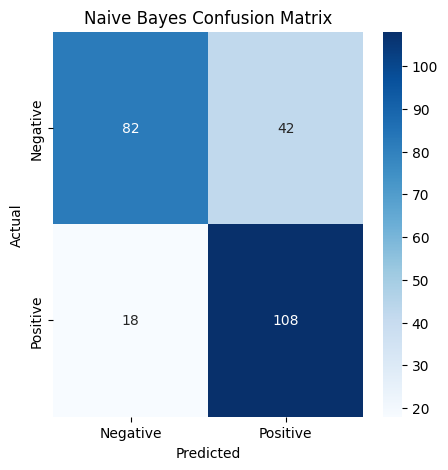

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


The Naive Bayes model achieved an accuracy of 76%, with better performance in identifying positive reviews (Recall: 0.86) than negative ones (Recall: 0.66). It correctly predicted 108 positive and 82 negative reviews, but misclassified 42 negative and 18 positive reviews. The F1-scores are 0.73 (negative) and 0.78 (positive), indicating a fairly balanced performance. The ROC-AUC score of 0.76 suggests good overall class separability. The model can be further improved by reducing false positives for negative reviews.





Natural Language Processing (NLP) is essential for detecting and analyzing restaurant reviews because reviews are written in human language, not numbers. NLP helps convert these unstructured texts into a structured format that machines can understand. By using techniques like stopwords removal, stemming, and vectorization, we extract meaningful features that allow machine learning models to classify sentiments (positive or negative).

Without NLP, we would treat the review text as raw strings or arbitrary characters, which would lose all contextual and semantic meaning. This would make it impossible for a model to understand tone, sentiment, or relevant words — resulting in poor predictions. NLP bridges the gap between human language and machine understanding, making review analysis accurate, scalable, and efficient.